In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Numerical Evaluation of Proposition 5

The proposition states: Let $\mathcal{H}$ be a model space with Radon number $r\in\mathbb{N}$, $\mathcal{E}$ a convex risk, and $\mathcal{A}$ a learning algorithm with sample size $n_0(\epsilon,\delta)$. Given $\epsilon>0$, $\delta\in (0,r^{-1})$ and any $h\in\mathbb{N}$, and local datasets $D_1,\dots,D_m$ of size $n\in\mathbb{N}$ with $m\geq r^h$, then FedDC using the Radon point with aggr. period
\begin{equation*}
b\geq  d\frac{m}{\delta^\frac{1}{2m}}\left(H_m-H_{m-\left\lceil n^{-1}n_0\left(\epsilon,\sqrt{\delta}\right)\right\rceil}\right)
%b\geq  d\frac{\left\lceil n^{-1}n_0\left(\epsilon,\sqrt{\delta}\right)\right\rceil}{\delta^\frac{1}{2m}}H_{\left\lceil n^{-1}n_0\left(\epsilon,\sqrt{\delta}\right)\right\rceil}
\end{equation*}
improves model quality in terms of $(\epsilon,\delta)$-guarantees.

Here, 
$$
H_m=\sum_{i=1}^m \frac{1}{i}
$$
is the $m$-th harmonic number.

We now implement $H_m$ and the lower bound on $b$.

In [5]:
def Hn(n):
    return sum([1./i for i in range(1,n+1)])

def nfrac(n, n0):
    return math.ceil(n0/float(n))

def n0func(eps, delta):
    return (1./eps)*math.log(1./delta)

def bfunc(eps, delta, n, m, d):
    k = nfrac(n, n0func(eps, delta))
    b = d*m / (delta**(1./(2*m)))
    b *= (Hn(m) - Hn(m-k))
    return b

### Evaluation for SUSY

We evaluate the bound for the setting used in the SUSY experiments.

In [60]:
m = 441
n = 2
d = 1
eps = 0.05
delta = 0.01

In [61]:
bfunc(eps, delta, n, m, d)

49.898296243030956

### Evaluation of $b$ wrt. $\delta$

We now evaluate the lower bound on $b$ wrt. the error probability $\delta$ of the local learning algorithm achieved for various local dataset sizes $n\in\{8,16,32,64,128,256\}$.

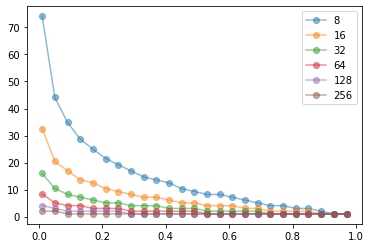

In [27]:
results = {}
deltas = [0.01 * i for i in range(1,100,4)]
ns = [8,16,32,64,128,256]
for n in ns:
    bs = [bfunc(eps, delta, n, m, d) for delta in deltas]
    results[n] = {}
    for i in range(len(deltas)):
        results[n][deltas[i]]= bs[i]
    plt.plot(deltas, bs, label=str(n), marker='o', alpha=0.5)
plt.legend()
plt.show()
        

We store these results in a text file to visualize them via pgfplots in the manuscript.

In [31]:
delim = " "
out = "delta"
for n in ns:
    out += delim + "n="+str(n)
out += "\n"
for delta in deltas:
    out += str(delta)
    for n in ns:
        out += delim+str(results[n][delta])
    out += "\n"
with open("aggPeriod_deltaN.txt", 'w') as f:
    f.write(out)

### Evaluation of $b$ wrt. $n$

We now evaluate the lower bound on $b$ wrt. the local dataset size $n$ for $\epsilon=0.01$, $\delta=0.01$ of the local learning algorithm achieved for various local dataset sizes $n\in\{8,16,32,64,128,256\}$.

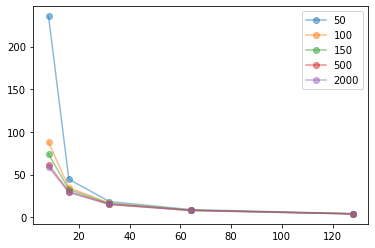

In [50]:
results = {}
delta = 0.01
ms = [50,100,150,500,2000]
ns = [8,16,32,64,128]
for m in ms:
    bs = [bfunc(eps, delta, n, m, d) for n in ns]
    results[m] = {}
    for i in range(len(ns)):
        results[m][ns[i]]= bs[i]
    plt.plot(ns, bs, label=str(m), marker='o', alpha=0.5)
plt.legend()
plt.show()

We store these results in a text file to visualize them via pgfplots in the manuscript.

In [55]:
delim = " "
out = "n"
for m in ms:
    out += delim + "m="+str(m)
out += "\n"
for n in ns:
    out += str(n)
    for m in ms:
        out += delim+str(results[m][n])
    out += "\n"
with open("aggPeriod_mN.txt", 'w') as f:
    f.write(out)